Step 1- Prerequisites(Gather/Label images,Create label_map...)

Refer the mentioned [Medium article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494) for more details!

Step 2- Set up the directory structure on Google Drive.

Refer the mentioned [Medium article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494) for more details!

Step 3- Select Hardware Accelerator.

On Colab, go to Runtime->Change Runtime Type and select Hardware accelerator as GPU.

NOTE:
If you have given different names to your files and folders, change the paths in cells below according to your files and folders!

## Cuda **Installation**

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


Check If GPU running

In [ ]:
!nvidia-smi

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
#Step 4- Mount Google Drive.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Step 5- Download TensorFlow Model Garden.

#cd into the TensorFlow directory in your Google Drive
%cd '/content/gdrive/My Drive/TensorFlow'

#and clone the TensorFlow Model Garden repository
!git clone https://github.com/tensorflow/models.git

In [ ]:
#Step 6- Install some required libraries and tools.

!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim

In [5]:
#Step 7- Compile the Protobuf libraries.

#cd into 'TensorFlow/models/research'
%cd '/content/gdrive/My Drive/TensorFlow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

[Errno 2] No such file or directory: '/content/gdrive/My Drive/TensorFlow/models/research/'
/Users/Shathusjan/Desktop/myresearch/TensorFlow/workspace/training_demo
Could not make proto path relative: object_detection/protos/*.proto: No such file or directory


In [3]:
#Step 8- Set the environment.

import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/My Drive/TensorFlow/models"
sys.path.append("/content/gdrive/My Drive/TensorFlow/models/research")

KeyError: 'PYTHONPATH'

In [4]:
#Step 9- Build and Install setup.py.

!python setup.py build
!python setup.py install

python: can't open file 'setup.py': [Errno 2] No such file or directory
python: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
#Step 10- Test the installation.

#cd into 'TensorFlow/models/research/object_detection/builders/'
%cd '/content/gdrive/My Drive/TensorFlow/models/research/object_detection/builders/'
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

NOTE:

You should have the images in test and train folder (with their corresponding XML files) and label_map.pbtxt file ready in respective directories.

You should also have the generate_tfrecord.py in your preprocessing directory.

If you don't have these files ready, go back to Step 1 and finish downloading required files.

In [8]:
#Step 11- Generate TFrecords.

#cd into preprocessing directory
%cd '/content/gdrive/My Drive/TensorFlow/scripts/preprocessing'

#run the cell to generate test.record and train.record
!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/train2' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record'
!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record'

# !python generate_tfrecord.py -x '[path_to_train_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/train.record'
# !python generate_tfrecord.py -x '[path_to_test_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/test.record'


/content/gdrive/My Drive/TensorFlow/scripts/preprocessing
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record


NOTE:

If you haven't downloaded any pre-trained model yet, go back to Step 1 and finish downloading any pre-trained model of your choice.

We are almost ready to start our model training, just a few more steps before we start our model training!

Step 12- Copying some files


*   Copy the "model_main_tf2.py" file from   "TensorFlow\models\research\object_detection" and paste it into training_demo. We will need this file for training the model.

*   Copy the "exporter_main_v2.py" file from "TensorFlow\models\research\object_detection" and paste it into training_demo.
We will need this file to export the trained model






Step 13- Configure the pipeline file.

Refer the mentioned [Medium article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494) for more details!

In [16]:
#Step 14- Start Tensorboard.

#cd into training_demo
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

#start the Tensorboard
%load_ext tensorboard
%tensorboard --logdir=models/Sketch2Code_model_v2

# %load_ext tensorboard
# %tensorboard --logdir=models/[name_of_pre-trained-model_you_downloaded]

/content/gdrive/My Drive/TensorFlow/workspace/training_demo
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 591), started 0:17:06 ago. (Use '!kill 591' to kill it.)

<IPython.core.display.Javascript object>

In [15]:
#optional
#code to check how much session time is remaining 

import time,psutil
uptime=time.time()-psutil.boot_time()
remaintime=(12*60*60)-uptime
print(remaintime/(60*60))

11.643033251100116


In [ ]:
pip install lvis

In [ ]:
#Step 15- Train the model.

#run the cell to start model training 
!python model_main_tf2.py --model_dir=models/Sketch2Code_model_v2 --pipeline_config_path=models/Sketch2Code_model_v2/pipeline.config

# !python model_main_tf2.py --model_dir=models/[name_of_pre-trained-model_you_downloaded] --pipeline_config_path=models/[name_of_pre-trained-model_you_downloaded]/pipeline.config

Congratulations! You have finished model training!

In [17]:
# when straightly Testing model
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


In [ ]:
#Step 16- Export the Trained Model.

#run the cell to start model training 
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/Sketch2Code_model_v2/pipeline.config --trained_checkpoint_dir ./models/Sketch2Code_model_v2/ --output_directory ./exported-models/Sketch2Code_model_v2

# !python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/[name_of_pre-trained-model you downloaded]/pipeline.config --trained_checkpoint_dir ./models/[name_of_pre-trained-model_you_downloaded]/ --output_directory ./exported-models/my_model

We have finished training and exporting our model. It's time to test our model!

In [1]:
#Step 17- Test the Model.

#Loading the saved_model
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="pre-trained-models/my_model_640x640/saved_model"
#PATH_TO_SAVED_MODEL="/content/gdrive/My Drive/TensorFlow/workspace/training_demo/exported-models/Sketch2Code_model_v2/saved_model"

print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


In [16]:
#Step 18- Testing the Model.

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("annotations/label_map.pbtxt",use_display_name=True)
print(type(category_index))
print(type(category_index[1])) 
print(category_index[1]['name']) 

#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

<class 'dict'>
<class 'dict'>
TextView


In [6]:
#Step 19- Testing the Model.

#Loading the image
#img=['/content/gdrive/My Drive/TensorFlow/test2.jpg','/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/img82.jpg','/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/img83.jpg']
img = []
basePath = 'images/test/'
start=80

for i in range(1):
  imagePath = basePath+"img"+str(start+i)+".jpg"
  img.append(imagePath)

print(img)

#list containing paths of all the images

['images/test/img80.jpg']


Running inference for images/test/img80.jpg... <class 'dict'>
dict_keys(['detection_multiclass_scores', 'detection_scores', 'detection_anchor_indices', 'raw_detection_boxes', 'detection_classes', 'detection_boxes', 'raw_detection_scores', 'num_detections'])
dict_keys(['detection_multiclass_scores', 'detection_scores', 'detection_anchor_indices', 'raw_detection_boxes', 'detection_classes', 'detection_boxes', 'raw_detection_scores', 'num_detections'])
Filtered Score
[0.99573463 0.9935069  0.9931438  0.9910205  0.9903314  0.9900545
 0.9888305  0.9870902  0.9835381  0.9824118  0.964084   0.9501165
 0.9491771  0.9413742  0.8913969  0.8736193  0.77883    0.5947684
 0.5579726  0.50739515]
<class 'numpy.ndarray'>
Filtered Classes
[ 1  1  1  1  4  1  4  4  4  4 24 26  1 24  7 24 24 24 28 13]
<class 'numpy.ndarray'>
Filtered Boxes
[[0.42826882 0.49922273 0.62864906 0.57115036]
 [0.46245942 0.34094802 0.60714906 0.39512405]
 [0.4280481  0.21653874 0.6178394  0.26485375]
 [0.43668184 0.6384833  0.

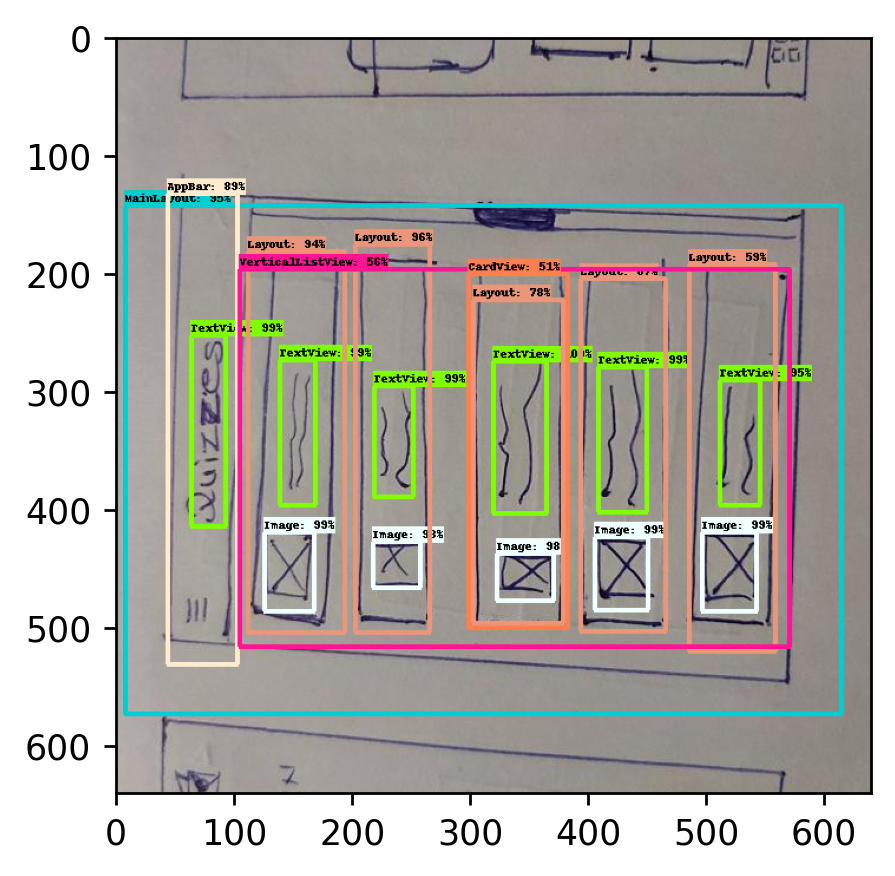

In [19]:
#Step 20- Running the Inference.

import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in img:

    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()
    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor=tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor=input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections=detect_fn(input_tensor)
    print(type(detections))
    print(detections.keys())
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections

    # detection_classes should be ints.
    detections['detection_classes']=detections['detection_classes'].astype(np.int64)
    
    print(detections.keys())
    # Filtering Detection
    detected_scores= detections['detection_scores'];
    detected_classes= detections['detection_classes'];
    detected_boxes= detections['detection_boxes'];
    threshold_filter = detected_scores > 0.5
    filterd_scores = detected_scores[threshold_filter]
    filterd_classes = detected_classes[threshold_filter]
    filterd_boxes = detected_boxes[threshold_filter]
    
    print('Filtered Score')
    print(filterd_scores)
    print(type(filterd_scores))
    print('Filtered Classes')
    print(filterd_classes)
    print(type(filterd_classes))
    print('Filtered Boxes')
    print(filterd_boxes)
    print(type(filterd_boxes)) 
    
    

    image_np_with_detections=image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=50,     #max number of bounding boxes in the image
          min_score_thresh=.5,      #min prediction threshold
          agnostic_mode=False)
    %matplotlib inline
    mpl.rcParams['figure.dpi']= 250
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()